**Nama : Siti Ma'rifatul Khoiriyah**

**Nim : 210411100007**

# **Tugas 5 Keyword Extraction**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
!pip install Sastrawi
nltk.download('punkt')
from nltk.corpus import stopwords
#stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize

import networkx as nx
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.4 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Baca file CSV
df = pd.read_csv("/content/drive/My Drive/PPW/report/tugas_ppw/hasil_prepros.csv")
df.head()

,judul,tanggal,isi,kategori,cleansing,case_folding,tokenize,stopword_removal
0,Potret Cantik Enzy Storia Saat Kulineran di Pa...,"Rabu, 25 Sep 2024 22:00 WIB",Jakarta - Enzy Storia banjir pujian setelah ta...,Makanan,Jakarta Enzy Storia banjir pujian setelah tam...,jakarta enzy storia banjir pujian setelah tam...,"['jakarta', 'enzy', 'storia', 'banjir', 'pujia...",jakarta enzy storia banjir pujian tampil paris...
1,Potret Mesra Sahrul Gunawan Saat Kulineran Bar...,"Rabu, 25 Sep 2024 21:00 WIB",Jakarta - Sahrul Gunawan dan istri gagal punya...,Makanan,Jakarta Sahrul Gunawan dan istri gagal punya ...,jakarta sahrul gunawan dan istri gagal punya ...,"['jakarta', 'sahrul', 'gunawan', 'dan', 'istri...",jakarta sahrul gunawan istri gagal anak mencob...
2,Ditegur Staf Restoran Gegara Bawa Makanan dari...,"Rabu, 25 Sep 2024 19:30 WIB",Jakarta - Seorang pengunjung restoran jadi sak...,Makanan,Jakarta Seorang pengunjung restoran jadi saks...,jakarta seorang pengunjung restoran jadi saks...,"['jakarta', 'seorang', 'pengunjung', 'restoran...",jakarta pengunjung restoran saksi mata keribut...
3,Unik! Burger Ini Isinya Kepiting Utuh Berukura...,"Rabu, 25 Sep 2024 19:00 WIB",Jakarta - Biasanya burger berisi patty atau da...,Makanan,Jakarta Biasanya burger berisi patty atau dag...,jakarta biasanya burger berisi patty atau dag...,"['jakarta', 'biasanya', 'burger', 'berisi', 'p...",jakarta burger berisi patty daging sapi bundar...
4,"Qobe Mie: Sensasi Mie Pedas Baru di Bogor, Lar...","Rabu, 25 Sep 2024 18:41 WIB",Jakarta - Ingin coba menikmati sensasi lezat m...,Makanan,Jakarta Ingin coba menikmati sensasi lezat mi...,jakarta ingin coba menikmati sensasi lezat mi...,"['jakarta', 'ingin', 'coba', 'menikmati', 'sen...",jakarta coba menikmati sensasi lezat mie pedas...


In [ ]:
# Mengambil satu sample berita
sample_berita = df['stopword_removal'].iloc[4]

sample_berita_list = [sample_berita]
print(sample_berita_list)


['jakarta coba menikmati sensasi lezat mie pedas menggoyang lidah pilihan kuliner nikmat layak dicoba pencinta kuliner bogor barat qobe mie kuliner konsep restoran unik menu menggugah selera sukses menarik perhatian masyarakat diinisiasi bisnis keluarga jember qobe mie berkembang restoran modern bogor menghadirkan konsep berbeda restoran mie lezat menciptakan suasana nyaman pengunjung pendiri qobe mie angga ramadani pengusaha muda jember keterangan tertulis rabu salah menu andalan qobe mie mie qobe mie goreng cita khas mie qobe berbeda mie goreng bumbubumbu pilihan teknik pengolahan khusus menghasilkan unik dino mie qobe varian mi mie gala asin original mie chilli oil mie yamin banjir favorit pelanggan melengkapi menu qobe mie menyediakan pilihan dimsum siomay mentai bola rambutan ketinggalan beragam minuman segar es teh tarik hebring es magenta amazon jelly tersedia menyegarkan tenggorokan pilihan lengkap pelanggan makanan utama minuman penutup dino keunikan qobe mie mengusung perpadu

In [ ]:
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer tanpa batasan jumlah fitur
vectorizer = TfidfVectorizer()

# Fit dan transform teks ke dalam TF-IDF
tfidf_matrix = vectorizer.fit_transform(sample_berita_list)

# Konversi TF-IDF matrix ke DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df.head()

,amazon,anak,andalan,angga,antusiasme,asin,asri,asyik,banjir,banten,...,terjangkau,terkemuka,tersedia,tertulis,unik,utama,varian,visi,wilayah,yamin
0,0.025591,0.025591,0.025591,0.025591,0.025591,0.025591,0.025591,0.025591,0.025591,0.025591,...,0.051181,0.025591,0.025591,0.025591,0.076772,0.025591,0.025591,0.025591,0.025591,0.025591


In [ ]:
# Ubah nilai TF-IDF di bawah 0.5 menjadi 0, dan di atas atau sama dengan 0.5 menjadi 1
df_tfidf_1berita = tfidf_df.apply(lambda col: col.map(lambda x: 1 if x >= 0.1 else 0))

# Menampilkan DataFrame dengan nilai biner
df_tfidf_1berita

,amazon,anak,andalan,angga,antusiasme,asin,asri,asyik,banjir,banten,...,terjangkau,terkemuka,tersedia,tertulis,unik,utama,varian,visi,wilayah,yamin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membuat graf berdasarkan co-occurrence fitur
G = nx.Graph()

# Menambahkan node ke graf
for feature in df_tfidf_1berita.columns:
    G.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence
for i in range(len(df_tfidf_1berita)):
    features = df_tfidf_1berita.iloc[i]
    active_features = features[features == 1].index.tolist()

    for j in range(len(active_features)):
        for k in range(j + 1, len(active_features)):
            G.add_edge(active_features[j], active_features[k])

# Hitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Konversi hasil degree centrality ke DataFrame untuk lebih mudah dilihat
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])

# Mengurutkan DataFrame dari yang terbesar sampai terkecil
df_degree_centrality_sorted = df_degree_centrality.sort_values(by='Degree Centrality', ascending=False)

# Tampilkan hasil degree centrality yang sudah diurutkan
print(df_degree_centrality_sorted)

            Node  Degree Centrality
96           mie           0.065789
106    pelanggan           0.065789
60       kuliner           0.065789
136      suasana           0.065789
126     restoran           0.065789
..           ...                ...
51    keterangan           0.000000
52   ketinggalan           0.000000
53      keunikan           0.000000
54          khas           0.000000
152        yamin           0.000000

[153 rows x 2 columns]


In [ ]:
# Ambil top 10 fitur dengan degree centrality tertinggi
top_10_features = df_degree_centrality_sorted.head(10)['Node'].tolist()

# DataFrame yang difilter berdasarkan top 10 fitur
filtered_df_train_tfidf = df_tfidf_1berita.copy()  # Tetap menyimpan semua fitur

# Tampilkan pesan tentang top 10 fitur yang terpilih
print("\nTop 10 fitur berdasarkan degree centrality:")
print(top_10_features)

# Tampilkan DataFrame asli yang masih memiliki semua fitur
print("\nDataFrame asli dengan semua fitur (tanpa menghapus):")
print(filtered_df_train_tfidf)



Top 10 fitur berdasarkan degree centrality:
['mie', 'pelanggan', 'kuliner', 'suasana', 'restoran', 'nyaman', 'konsep', 'menu', 'dino', 'qobe']

DataFrame asli dengan semua fitur (tanpa menghapus):
   amazon  anak  andalan  angga  antusiasme  asin  asri  asyik  banjir  \
0       0     0        0      0           0     0     0      0       0   

   banten  ...  terjangkau  terkemuka  tersedia  tertulis  unik  utama  \
0       0  ...           0          0         0         0     0      0   

   varian  visi  wilayah  yamin  
0       0     0        0      0  

[1 rows x 153 columns]


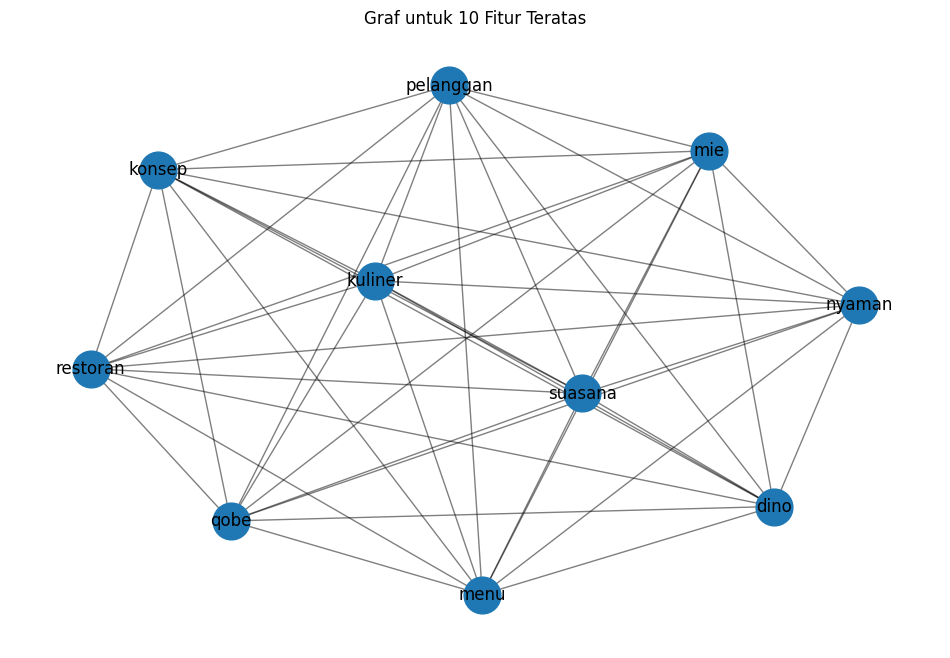

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Membuat graf baru hanya untuk fitur teratas
G_top_10 = nx.Graph()

# Menambahkan node teratas ke graf
for feature in top_10_features:
    G_top_10.add_node(feature)

# Pastikan df_tfidf_1berita adalah nama yang benar dari dataframe yang mengandung data biner (TF-IDF)
if 'df_tfidf_1berita' in locals():  # Memeriksa apakah dataframe df_tfidf_1berita sudah ada
    # Menambahkan edge berdasarkan co-occurrence dari fitur teratas
    for i in range(len(df_tfidf_1berita)):  # Pastikan dataframe ini ada dan ukurannya benar
        features = df_tfidf_1berita.iloc[i]
        active_features = features[features == 1].index.tolist()
        active_top_10_features = [f for f in active_features if f in top_10_features]

        for j in range(len(active_top_10_features)):
            for k in range(j + 1, len(active_top_10_features)):
                G_top_10.add_edge(active_top_10_features[j], active_top_10_features[k])

    # Mengatur ukuran figure untuk visualisasi graf
    plt.figure(figsize=(12, 8))

    # Menggambar graf fitur teratas
    pos = nx.spring_layout(G_top_10)  # Menggunakan layout spring
    nx.draw_networkx_nodes(G_top_10, pos, node_size=700)  # Menggambar node
    nx.draw_networkx_edges(G_top_10, pos, width=1.0, alpha=0.5)  # Menggambar edge
    nx.draw_networkx_labels(G_top_10, pos, font_size=12, font_family='sans-serif')  # Menggambar label

    # Menampilkan graf
    plt.title('Graf untuk 10 Fitur Teratas')
    plt.axis('off')  # Menyembunyikan sumbu
    plt.show()
else:
    print("DataFrame 'df_tfidf_1berita' tidak ditemukan. Pastikan proses TF-IDF sudah dilakukan.")


In [ ]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G_top_10)

# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_top_10)

# Konversi hasil centrality ke DataFrame untuk lebih mudah dilihat
df_closeness_centrality = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])
df_betweenness_centrality = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])

# Menggabungkan semua centrality ke dalam satu DataFrame
df_centrality = pd.merge(df_degree_centrality_sorted, df_closeness_centrality, on='Node')
df_centrality = pd.merge(df_centrality, df_betweenness_centrality, on='Node')

# Menampilkan hasil centrality
print(df_centrality)

        Node  Degree Centrality  Closeness Centrality  Betweenness Centrality
0        mie           0.065789                   1.0                     0.0
1  pelanggan           0.065789                   1.0                     0.0
2    kuliner           0.065789                   1.0                     0.0
3    suasana           0.065789                   1.0                     0.0
4   restoran           0.065789                   1.0                     0.0
5     nyaman           0.065789                   1.0                     0.0
6     konsep           0.065789                   1.0                     0.0
7       menu           0.065789                   1.0                     0.0
8       dino           0.065789                   1.0                     0.0
9       qobe           0.065789                   1.0                     0.0


In [ ]:
# Mengambil kata kunci dengan nilai TF-IDF tertinggi untuk setiap dokumen
kata_kunci = df_tfidf_1berita.idxmax(axis=1)
print("\nKata kunci dari setiap dokumen:")
for i, kata in enumerate(kata_kunci):
    print(f"Dokumen {i+1}: {kata}")


Kata kunci dari setiap dokumen:
Dokumen 1: dino
